<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


[link text](https://)Plot the distribution curve for the column `ConvertedComp`.


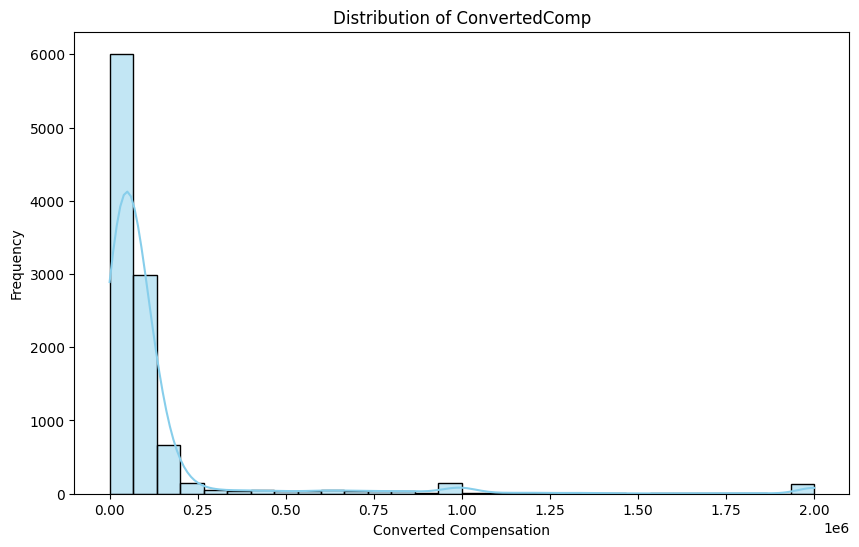

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
curve = df['ConvertedComp']
plt.figure(figsize=(10, 6))
sns.histplot(curve, kde=True, bins=30, color='skyblue')

# Set plot labels and title
plt.title('Distribution of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')

# Show the plot
plt.show()


[link text](https://)Plot the histogram for the column `ConvertedComp`.


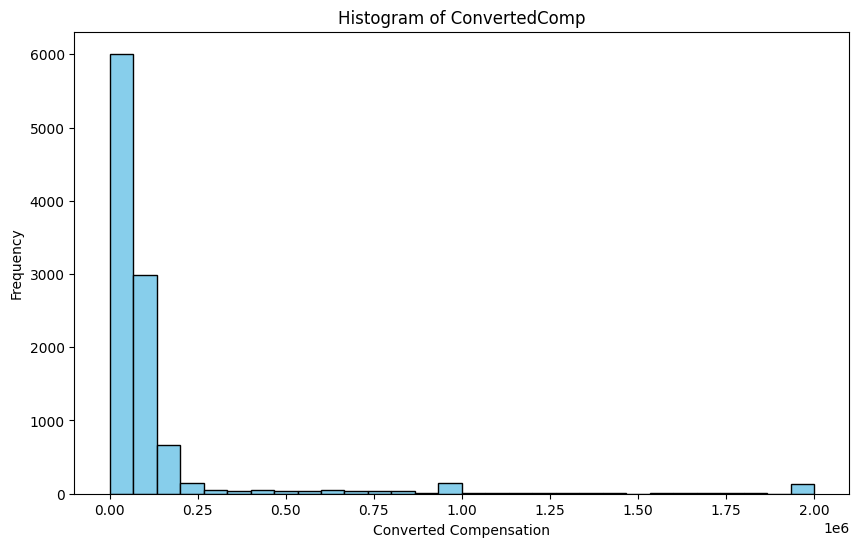

In [6]:
plt.figure(figsize=(10, 6))

# Plot histogram
plt.hist(curve, bins=30, color='skyblue', edgecolor='black')

# Set plot labels and title
plt.title('Histogram of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')

# Show the plot
plt.show()

*What* is the median of the column `ConvertedComp`?


In [9]:
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [12]:
df[df['Gender'] == 'Man'].shape[0]

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [15]:
df[df['Gender'] == 'Woman'].median()

<ipython-input-15-fab0863e1c18>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df['Gender'] == 'Woman'].median()


Respondent       11973.0
CompTotal        65000.0
ConvertedComp    57708.0
WorkWeekHrs         40.0
CodeRevHrs           4.0
Age                 28.0
dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [28]:
minimum = df['Age'].min()
Q1 = df['Age'].quantile(0.25)
median = df['Age'].median()
Q3 = df['Age'].quantile(0.75)
maximum = df['Age'].max()

# Display the five-number summary
print(f"Minimum: {minimum}")
print(f"Q1 (First Quartile): {Q1}")
print(f"Median: {median}")
print(f"Q3 (Third Quartile): {Q3}")
print(f"Maximum: {maximum}")

Minimum: 16.0
Q1 (First Quartile): 25.0
Median: 29.0
Q3 (Third Quartile): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


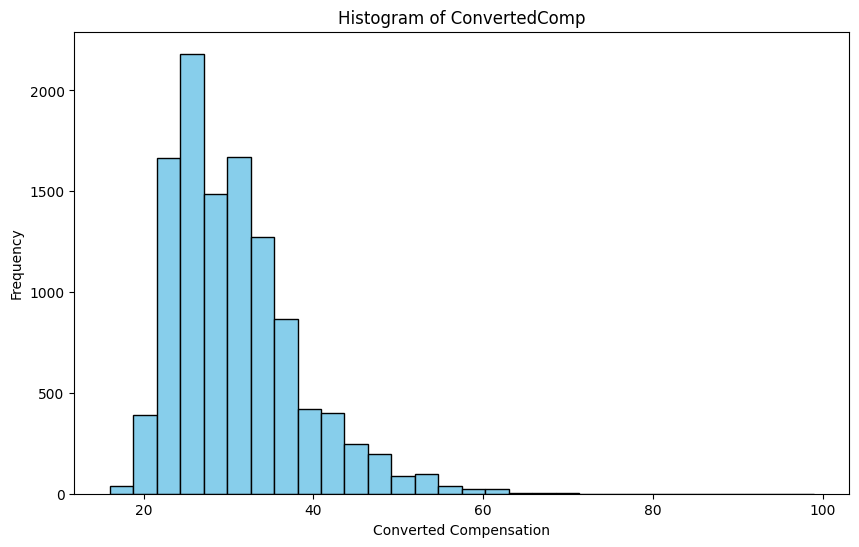

In [29]:
plt.figure(figsize=(10, 6))
data = df['Age']
# Plot histogram
plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# Set plot labels and title
plt.title('Histogram of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')

# Show the plot
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


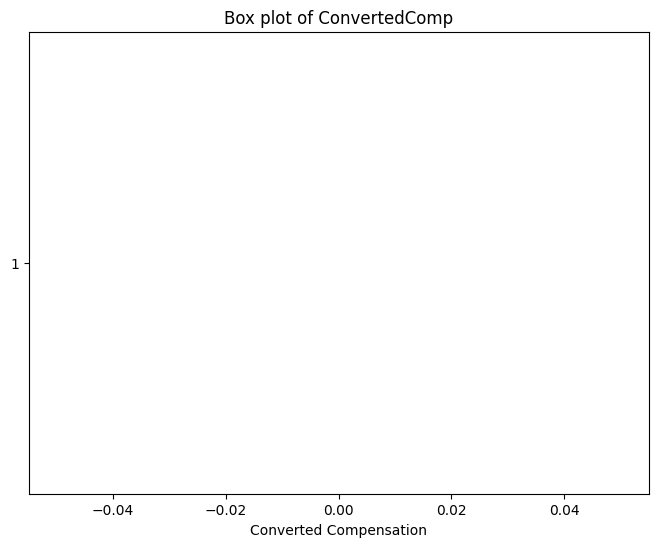

In [27]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['ConvertedComp'], vert=False)
plt.title('Box plot of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [25]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

print(f"Interquartile Range (IQR) for ConvertedComp: {IQR}")

Interquartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [26]:


# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

Lower bound for outliers: -82830.0
Upper bound for outliers: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [23]:


# Count outliers in ConvertedComp
outliers_below = df[df['ConvertedComp'] < lower_bound]
outliers_above = df[df['ConvertedComp'] > upper_bound]

total_outliers = outliers_below.shape[0] + outliers_above.shape[0]

print(f"Number of outliers in ConvertedComp: {total_outliers}")


Number of outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [24]:

# Create a new DataFrame without outliers in ConvertedComp
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Display information about removed outliers
outliers_removed = df.shape[0] - df_no_outliers.shape[0]
print(f"Number of outliers removed: {outliers_removed}")


Number of outliers removed: 1695


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [16]:
numerical_columns = df.select_dtypes(include=['number'])

# Calculating correlations with the 'Age' column
correlations = numerical_columns.corrwith(df['Age'])

print("Correlation between Age and other numerical columns:")
print(correlations)

Correlation between Age and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
